In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0.5, 0, 'Prices in $1000')

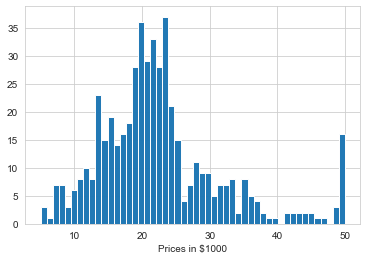

In [8]:
plt.hist(boston.target, bins=50,alpha=0.99)
plt.xlabel('Prices in $1000')

Text(0.5, 0, 'Number of rooms')

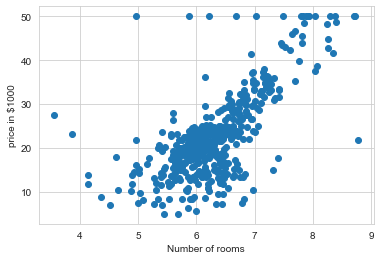

In [9]:
plt.scatter(boston.data[:,5], boston.target)
plt.ylabel('price in $1000')
plt.xlabel('Number of rooms')


In [10]:
boston_df=DataFrame(boston.data)
boston_df.columns=boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
boston_df['Price']=boston.target

In [12]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
x=np.array(boston_df['RM'])
A = np.vstack([x, np.ones(len(x))]).T
A

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [16]:
y=np.array(boston_df['Price'])

In [17]:
m, b = np.linalg.lstsq(A, y, rcond=None)[0]
m, b

(9.102108981180313, -34.67062077643857)

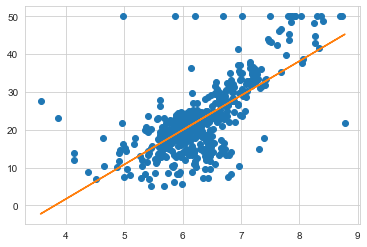

In [18]:
plt.plot(boston_df.RM, boston_df.Price,('o'))
X=boston_df.RM
plt.plot(X, m*X +b, label='best fit line')

In [32]:
result= np.linalg.lstsq(A, y, rcond=None)[0]
error_total=result[1]
rmse=np.sqrt(abs(error_total/len(A)))
rmse


0.26176136726448207

we can now say the price of a house won't vary more than two

times the rmse value 95% of the time.

In [43]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
lreg=LinearRegression()

In [35]:
x_multi= boston_df.drop('Price',1)
y_target= boston_df.Price

C:\Users\user\AppData\Local\Temp/ipykernel_13524/2895431328.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_multi= boston_df.drop('Price',1)


In [36]:
lreg.fit(x_multi, y_target)

LinearRegression()

In [37]:
lreg.intercept_

36.459488385089855

In [38]:
lreg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [40]:
coeff_df= DataFrame(boston_df.columns)
coeff_df.columns=['Features']
coeff_df['CoefficientEstimator']=Series(lreg.coef_)
coeff_df

,Features,CoefficientEstimator
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [44]:
x_train, x_test, y_train, y_test=train_test_split(A, boston_df.Price)

In [47]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 2), (127, 2), (379,), (127,))

In [49]:
lreg.fit(x_train, y_train)

LinearRegression()

In [53]:
pred_train=lreg.predict(x_train)
pred_test=lreg.predict(x_test)

In [54]:
#fitting a model with Xtrain and calculating the mse with Ytrain
np.mean((y_train-pred_train)**2)

41.61109623825332

In [55]:
#fitting a model with Xtest and calculating the mse with Ytest
np.mean((y_test-pred_test)**2)

49.60603407796811

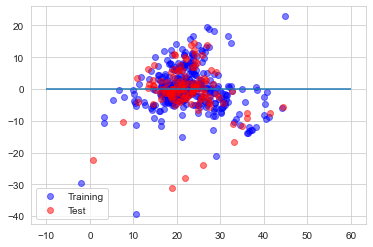

In [62]:
train= plt.scatter(pred_train,(pred_train-y_train), c='b', alpha=0.5)
test= plt.scatter(pred_test,(pred_test-y_test), c='r', alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=60)
plt.legend((train,test),('Training','Test'), loc='lower left')

Is the analysis good?